In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [14]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
model_path = '/content/drive/MyDrive/deteksi-gambar/model/model6.h5'

In [29]:
model = load_model(model_path)
test_data_dir = '/content/drive/MyDrive/deteksi-gambar/data/testing'

In [30]:
for class_name in ['organic', 'inorganic']:
    class_path = os.path.join(test_data_dir, class_name)
    filenames = os.listdir(test_data_dir)[:10]
    print(f"Class: {class_name}, Filenames: {filenames}")

Class: organic, Filenames: ['inorganic', 'organic']
Class: inorganic, Filenames: ['inorganic', 'organic']


Found 2513 images belonging to 2 classes.
79/79 [==============================] - 17s 213ms/step
accuracy testing =  0.8826104257859132
precision testing =  0.8897357008541029
recall testing =  0.8826104257859132
f1score testing =  0.8836839985394828


confusion matrix
[[ 898  214]
 [  81 1320]]


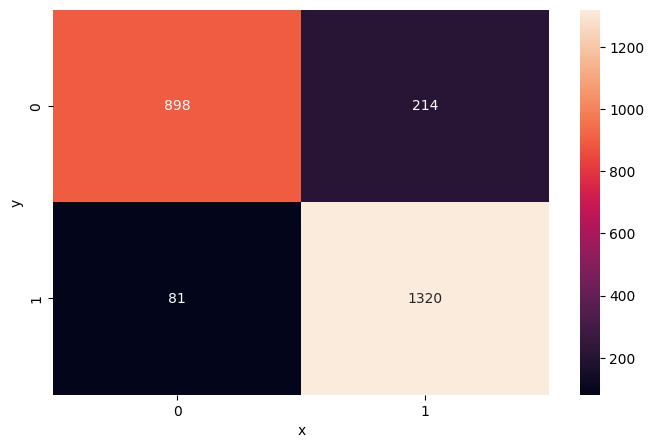

              precision    recall  f1-score   support

     organic       0.92      0.81      0.86      1112
   inorganic       0.86      0.94      0.90      1401

    accuracy                           0.88      2513
   macro avg       0.89      0.87      0.88      2513
weighted avg       0.89      0.88      0.88      2513

accuracy on test data : 0.8826 
loss on test data : 0.3037 



In [31]:
from operator import length_hint
datagen = ImageDataGenerator(
    rescale=1./255
)

test_data_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

test_prediction = np.argmax(model.predict(test_data_generator), axis=-1)
test_labels = test_data_generator.classes
acc_test = accuracy_score(test_prediction, test_labels)
prect_test = precision_score(test_prediction, test_labels, average='weighted')
rec_test = recall_score(test_prediction, test_labels, average='weighted')
f1score_test = f1_score(test_prediction, test_labels, average='weighted')

print('accuracy testing = ', acc_test)
print('precision testing = ', prect_test)
print('recall testing = ', rec_test)
print('f1score testing = ',f1score_test)

print("\n")
print("confusion matrix")
print(confusion_matrix(test_labels, test_prediction))

f, axis = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(test_labels, test_prediction), annot=True, fmt=".0f", ax=axis)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

target_names = ['organic', 'inorganic']
print(classification_report(test_labels, test_prediction, target_names=target_names))

loss, acc = model.evaluate(test_data_generator, steps=len(test_data_generator), verbose=0)
print('accuracy on test data : {:.4f} \nloss on test data : {:.4f}'.format(acc, loss), '\n')